In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
df=pd.read_csv(r"C:\Users\kulla\Desktop\Mini Project\Datasets\diabetes\diabetes_012_health_indicators_BRFSS2015.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [4]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
df.dtypes

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [6]:
df.dropna()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [7]:
df['Diabetes_012'].value_counts()

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64

In [8]:
df.columns


Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

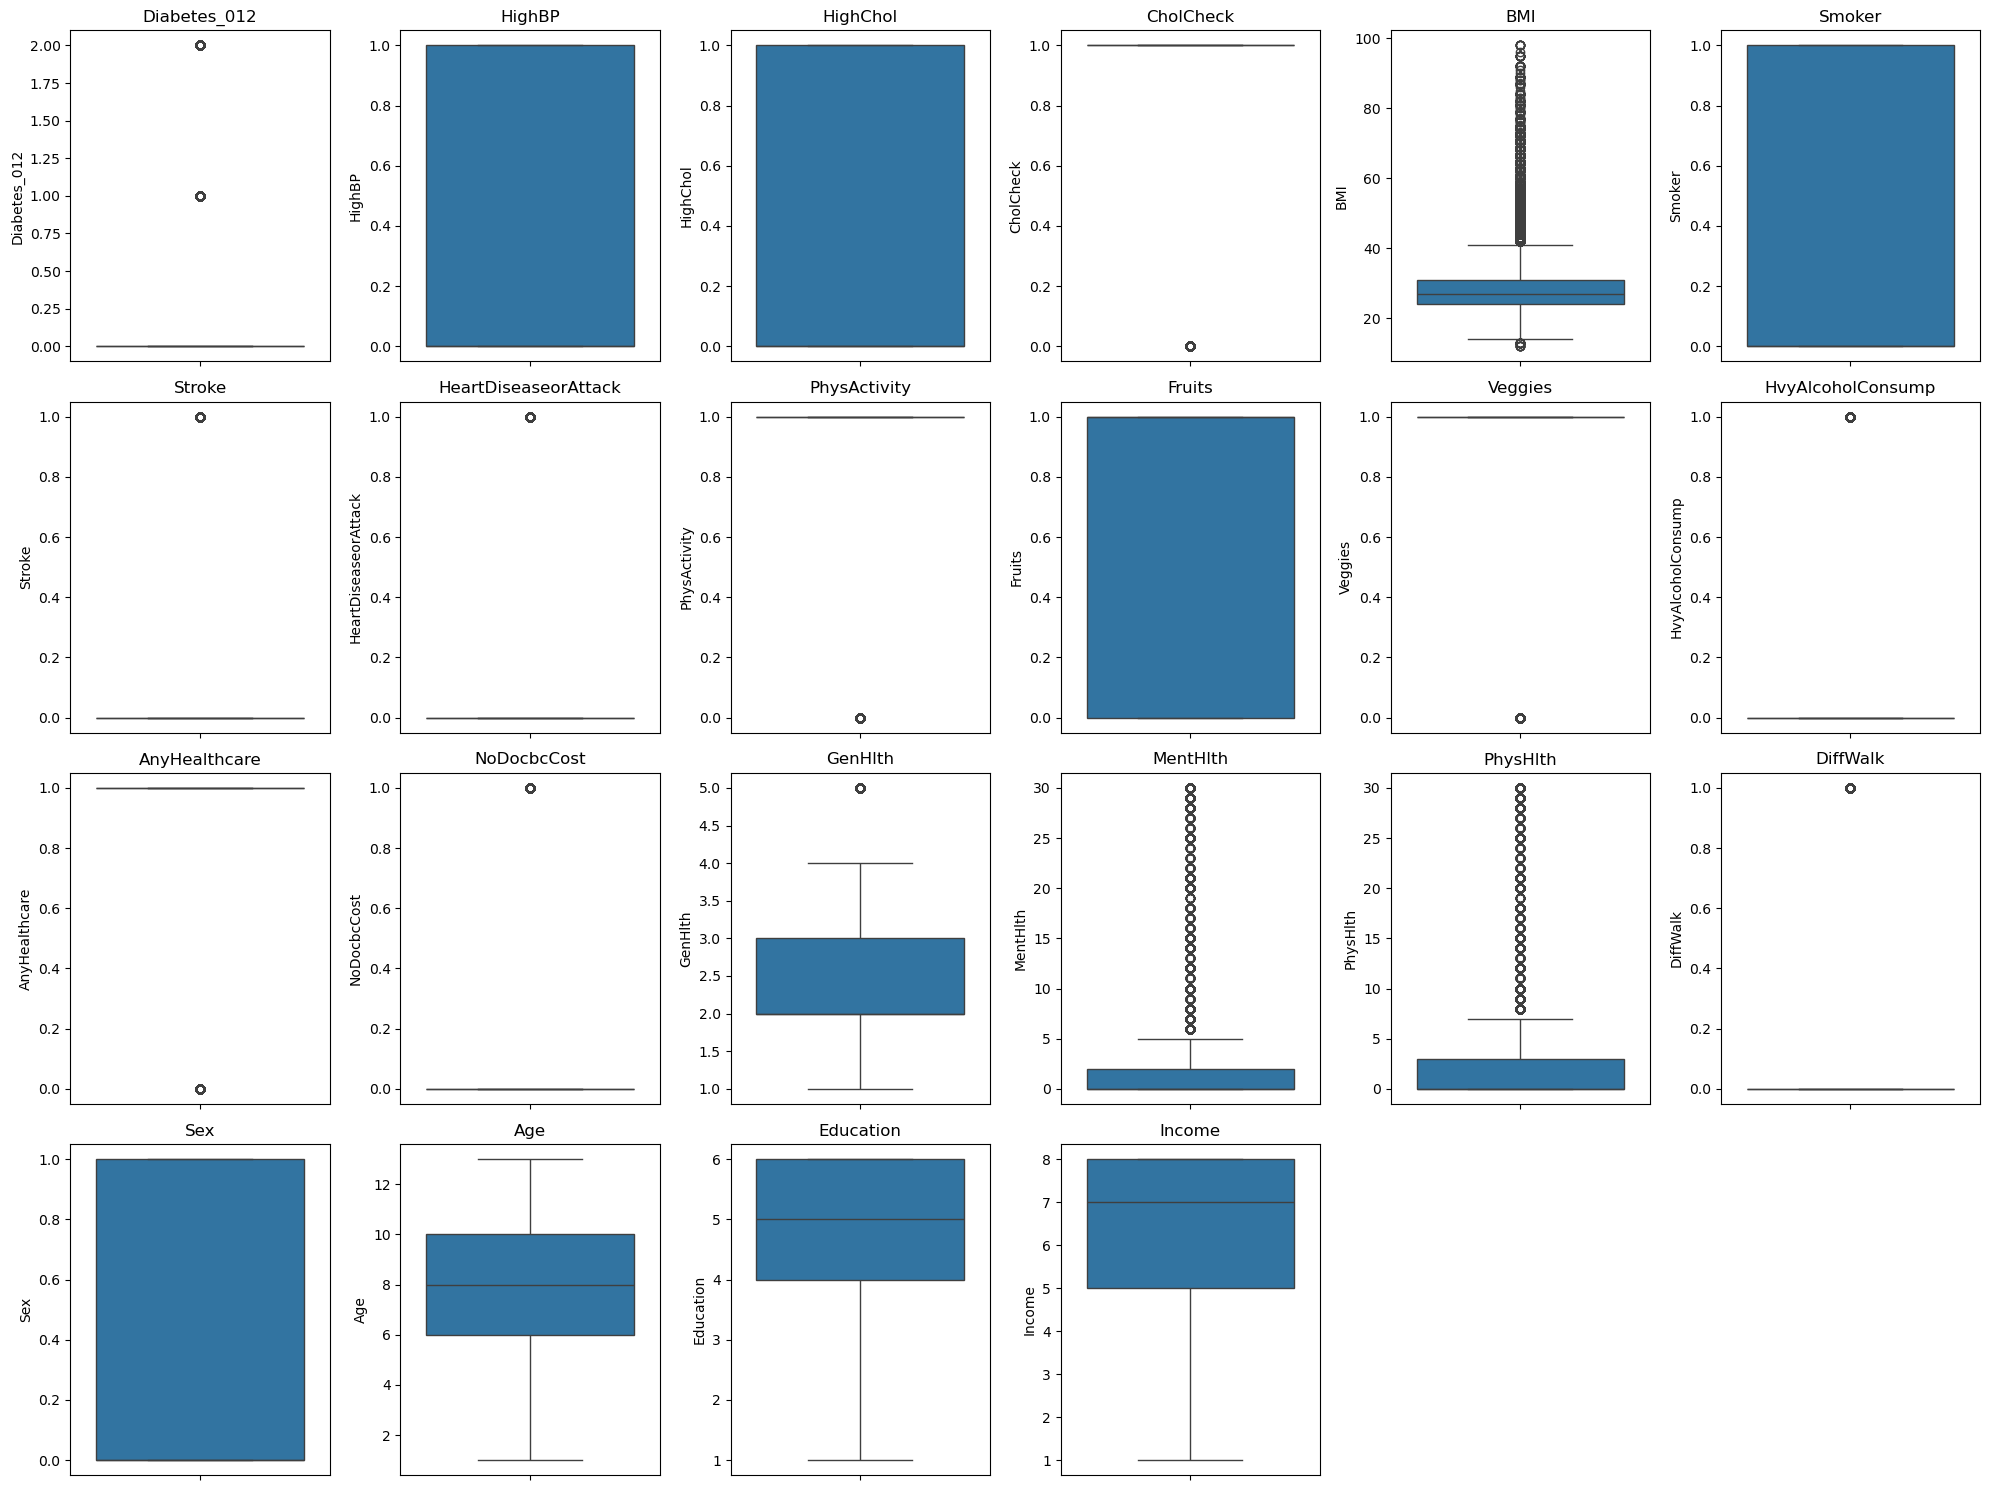

In [9]:
import seaborn as sns

numerical_features = [
    "Diabetes_012", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", 
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", 
    "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", 
    "Sex", "Age", "Education", "Income"
]

# Create subplots
rows, cols = 4, 6  
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 15))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


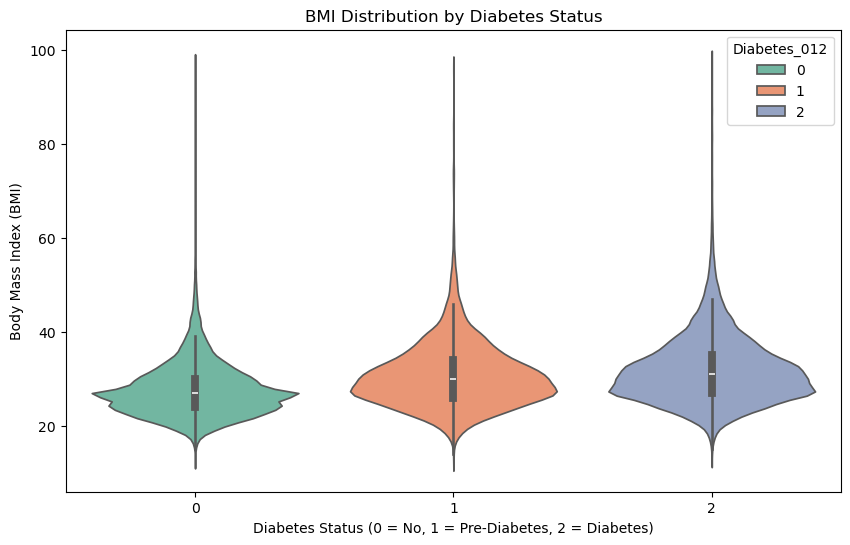

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.violinplot( data=df,x='Diabetes_012', y='BMI', hue="Diabetes_012", palette="Set2")
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("Diabetes Status (0 = No, 1 = Pre-Diabetes, 2 = Diabetes)")
plt.ylabel("Body Mass Index (BMI)")
plt.show()


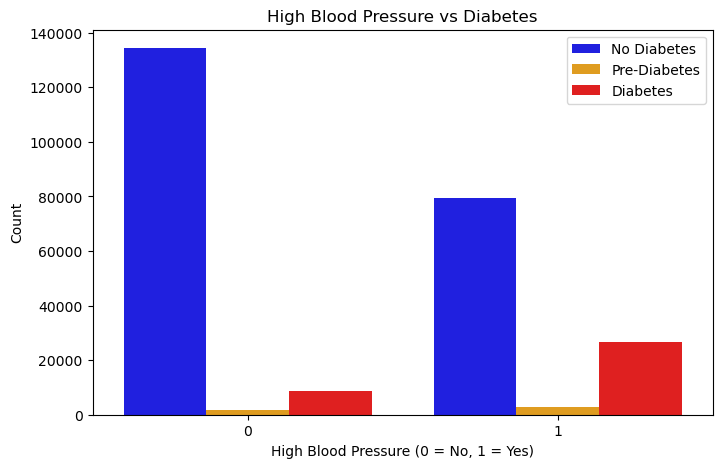

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='HighBP', hue='Diabetes_012', data=df, palette=['blue', 'orange', 'red'])
plt.title("High Blood Pressure vs Diabetes")
plt.xlabel("High Blood Pressure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(["No Diabetes", "Pre-Diabetes", "Diabetes"])
plt.show()


C:\Users\kulla\AppData\Local\Temp\ipykernel_15820\476769155.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Diabetes_012'] == 0]['BMI'], label="No Diabetes", shade=True)
C:\Users\kulla\AppData\Local\Temp\ipykernel_15820\476769155.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Diabetes_012'] == 1]['BMI'], label="Pre-Diabetes", shade=True)
C:\Users\kulla\AppData\Local\Temp\ipykernel_15820\476769155.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Diabetes_012'] == 2]['BMI'], label="Diabetes", shade=True)


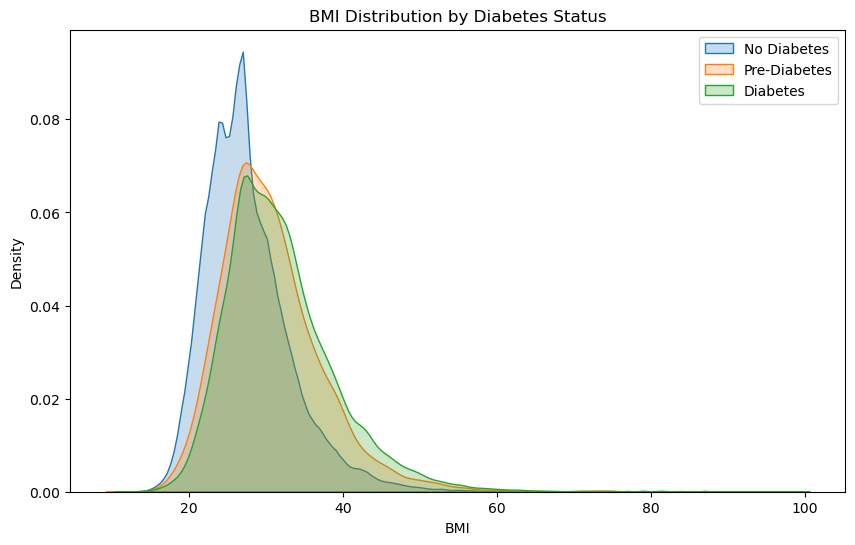

In [12]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Diabetes_012'] == 0]['BMI'], label="No Diabetes", shade=True)
sns.kdeplot(df[df['Diabetes_012'] == 1]['BMI'], label="Pre-Diabetes", shade=True)
sns.kdeplot(df[df['Diabetes_012'] == 2]['BMI'], label="Diabetes", shade=True)
plt.legend()
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()


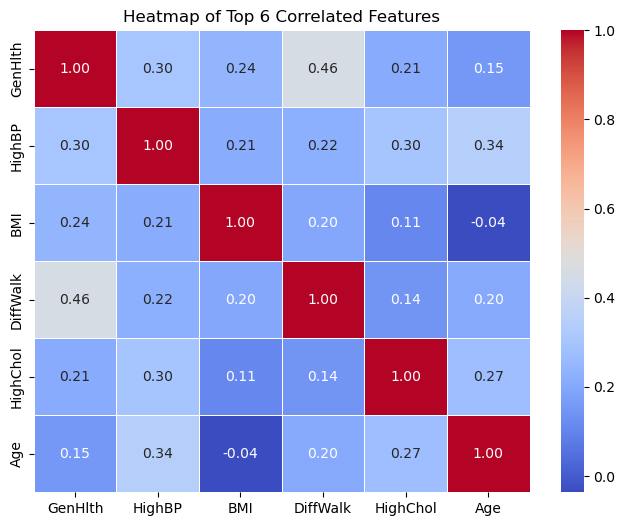

In [13]:
# Compute correlation matrix
corr_matrix = df[numerical_features].corr()

# Find top 6 features most correlated with "Diabetes_012"
top_features = corr_matrix["Diabetes_012"].abs().sort_values(ascending=False)[1:7].index

plt.figure(figsize=(8, 6))
sns.heatmap(df[top_features].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Top 6 Correlated Features")
plt.show()


In [14]:
selected_columns = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
data_to_scale = df[selected_columns]

# Apply MinMaxScaler
scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(data_to_scale)

print(df.head())


   Diabetes_012  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0             0       1         1          1  0.325581       1       0   
1             0       0         0          0  0.151163       1       0   
2             0       1         1          1  0.186047       0       0   
3             0       1         0          1  0.174419       0       0   
4             0       1         1          1  0.139535       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex       Age  \
0            0        5       0.6       0.5         1    0  0.666667

In [15]:
# Drop missing values
df = df.dropna()

# Define feature columns and target variable
feature_cols = df.columns.tolist()
feature_cols.remove('Diabetes_012') 
target_col = 'Diabetes_012'

X = df[feature_cols]
y = df[target_col]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


<Axes: xlabel='Diabetes_012', ylabel='count'>

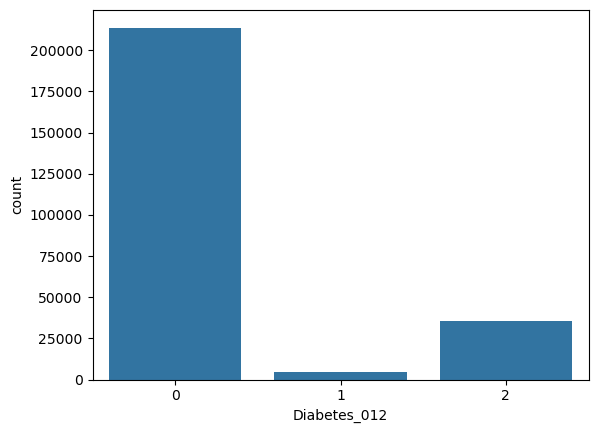

In [16]:
sns.countplot(x=df['Diabetes_012'])

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kulla\anaconda3\Lib\site-packag

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     42795
           1       0.00      0.00      0.00       944
           2       0.54      0.18      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736



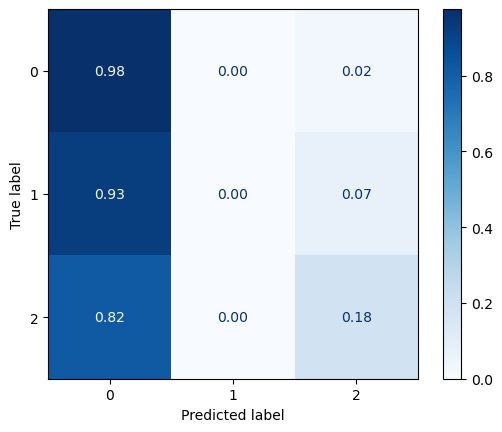

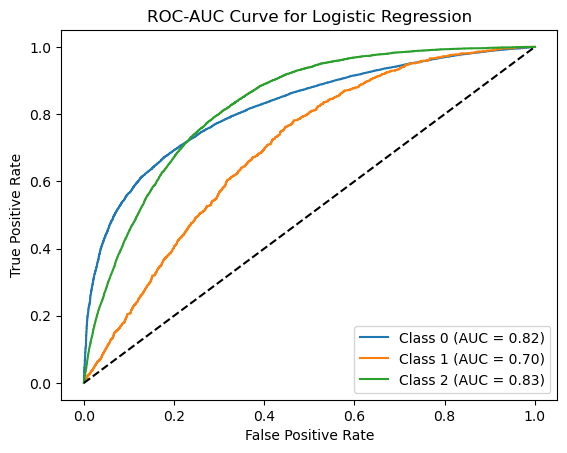

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91     42795
           1       0.00      0.00      0.00       944
           2       0.49      0.21      0.29      6997

    accuracy                           0.84     50736
   macro avg       0.45      0.39      0.40     50736
weighted avg       0.80      0.84      0.81     50736



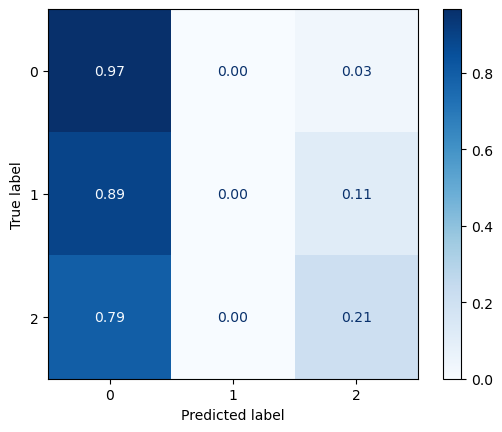

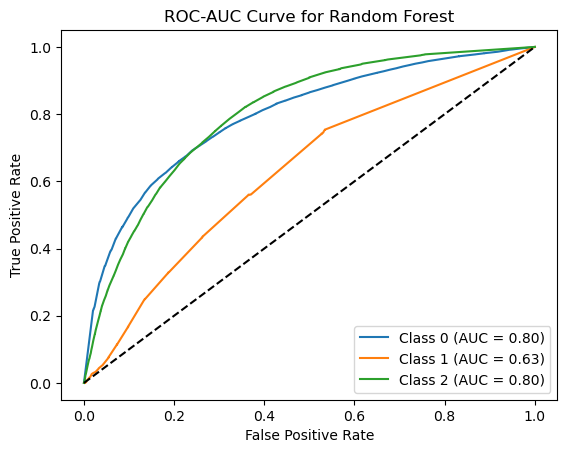

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     42795
           1       0.03      0.04      0.03       944
           2       0.29      0.33      0.31      6997

    accuracy                           0.77     50736
   macro avg       0.40      0.41      0.40     50736
weighted avg       0.78      0.77      0.77     50736



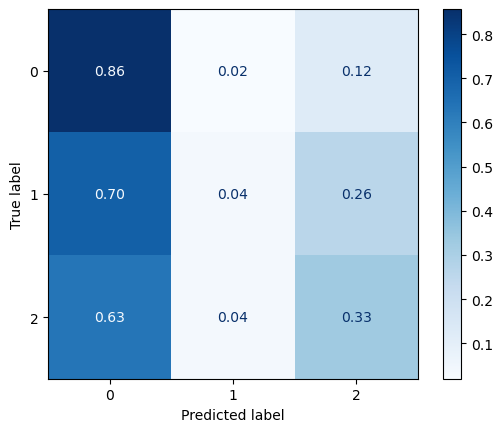

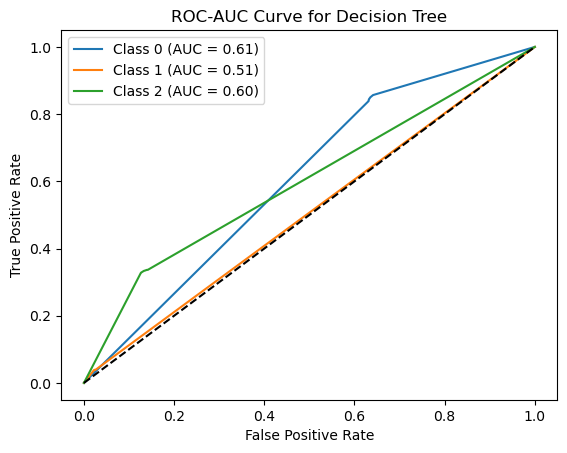

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:10:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     42795
           1       0.00      0.00      0.00       944
           2       0.55      0.20      0.29      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736



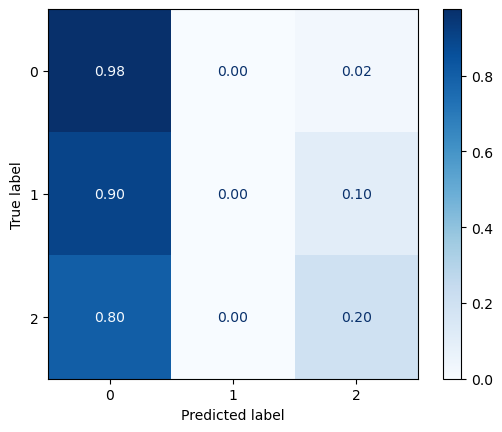

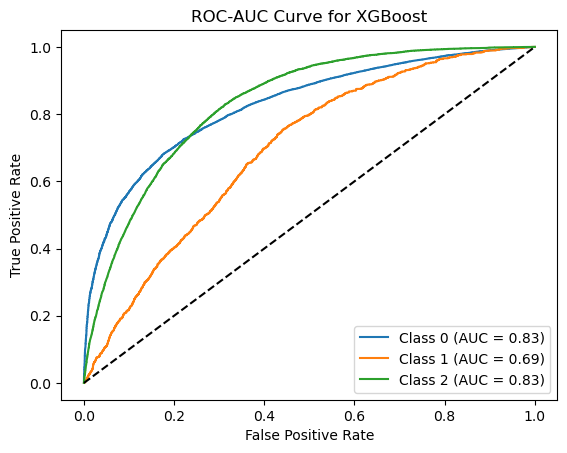

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-def

Classification Report for MLP Classifier:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     42795
           1       0.00      0.00      0.00       944
           2       0.52      0.24      0.33      6997

    accuracy                           0.85     50736
   macro avg       0.46      0.40      0.42     50736
weighted avg       0.81      0.85      0.82     50736



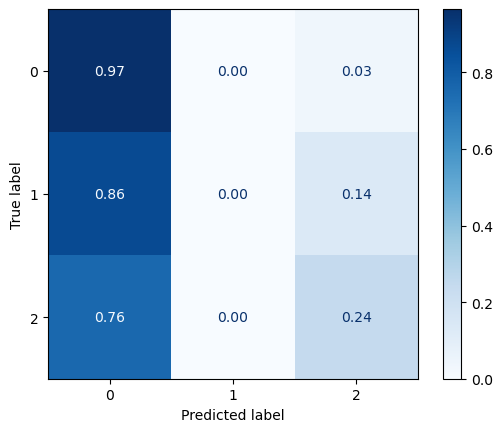

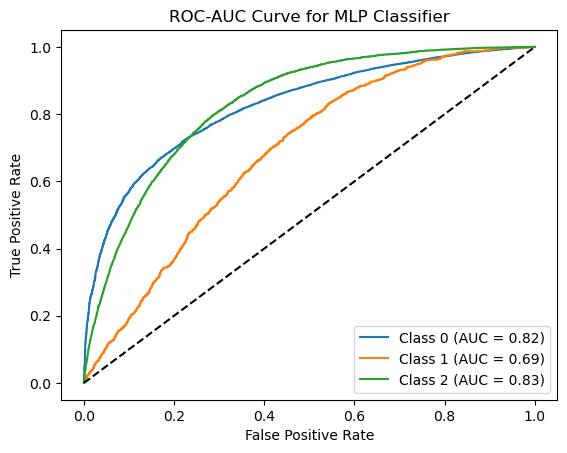

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.848254   0.802427  0.848254  0.810520  0.781650
1        Random Forest  0.843602   0.797937  0.843602  0.810515  0.742095
2        Decision Tree  0.768547   0.781627  0.768547  0.774835  0.570828
3              XGBoost  0.850442   0.806527  0.850442  0.814227  0.784529
4       MLP Classifier  0.848135   0.806187  0.848135  0.818461  0.780459


In [17]:

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
     "Decision Tree": DecisionTreeClassifier(),
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
     "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) 

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()

    results.append([name, accuracy, report['weighted avg']['precision'],
                    report['weighted avg']['recall'], report['weighted avg']['f1-score'], roc_auc])

    # ROC Curve
    from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC curve
    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2]) 
    n_classes = y_test_binarized.shape[1]

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_binarized[:, i], y_prob[:, i]):.2f})")

    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-AUC Curve for {name}")
    plt.legend()
    plt.show()

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
print(results_df)



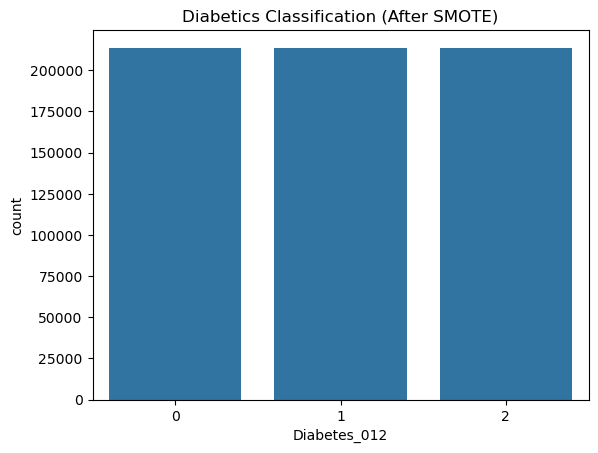

In [18]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
df_resampled = pd.DataFrame(y_resampled, columns=['Diabetes_012'])

sns.countplot(x=df_resampled['Diabetes_012'])
plt.title("Diabetics Classification (After SMOTE)")
plt.show()

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63     42688
           1       0.43      0.34      0.38     42676
           2       0.51      0.58      0.55     42858

    accuracy                           0.53    128222
   macro avg       0.52      0.53      0.52    128222
weighted avg       0.52      0.53      0.52    128222



<Figure size 1000x600 with 0 Axes>

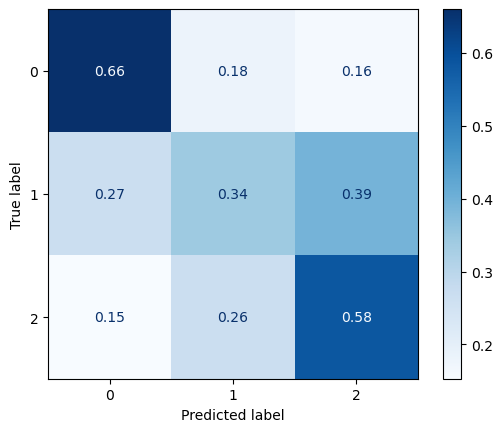

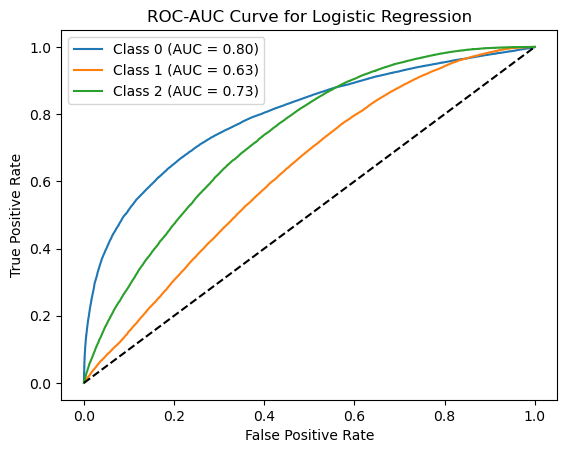

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     42688
           1       0.97      0.97      0.97     42676
           2       0.91      0.89      0.90     42858

    accuracy                           0.92    128222
   macro avg       0.93      0.93      0.93    128222
weighted avg       0.93      0.92      0.92    128222



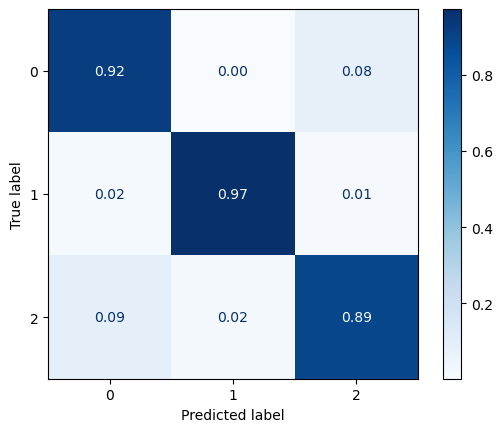

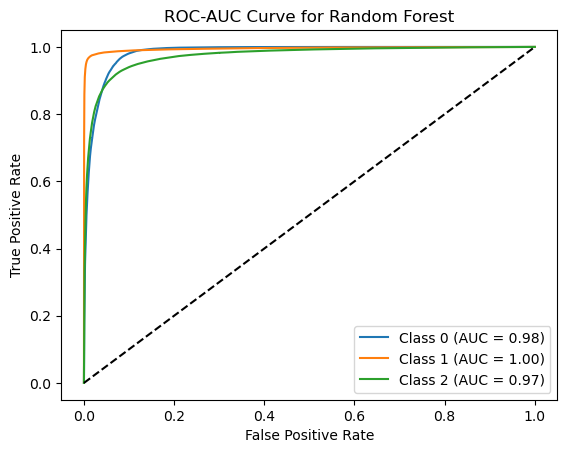

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     42688
           1       0.86      0.89      0.88     42676
           2       0.78      0.77      0.77     42858

    accuracy                           0.84    128222
   macro avg       0.84      0.84      0.84    128222
weighted avg       0.84      0.84      0.84    128222



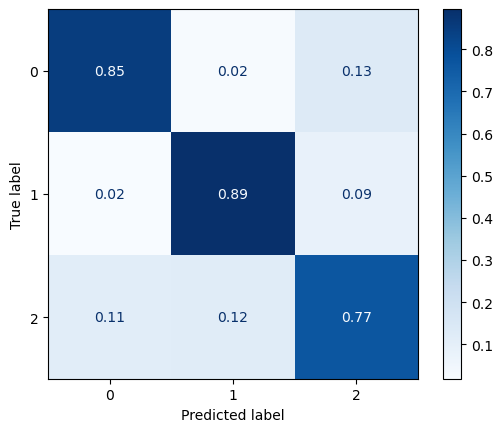

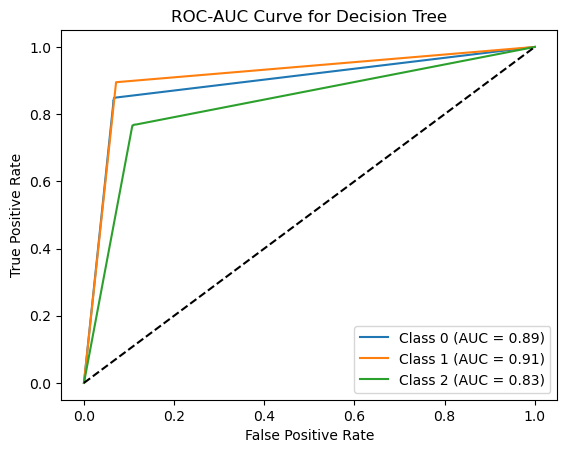

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:23:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     42688
           1       0.82      0.82      0.82     42676
           2       0.78      0.68      0.73     42858

    accuracy                           0.82    128222
   macro avg       0.82      0.82      0.82    128222
weighted avg       0.82      0.82      0.82    128222



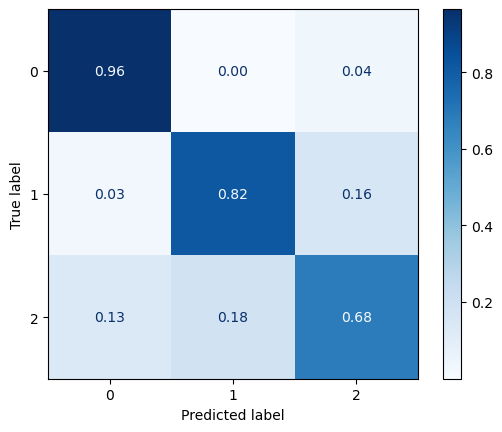

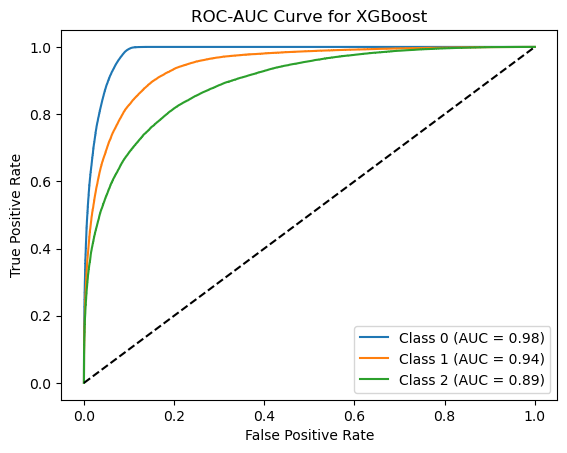

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     42688
           1       0.70      0.61      0.65     42676
           2       0.59      0.69      0.64     42858

    accuracy                           0.66    128222
   macro avg       0.66      0.66      0.66    128222
weighted avg       0.66      0.66      0.66    128222



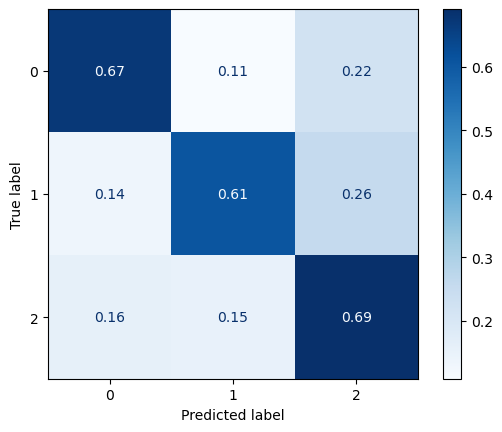

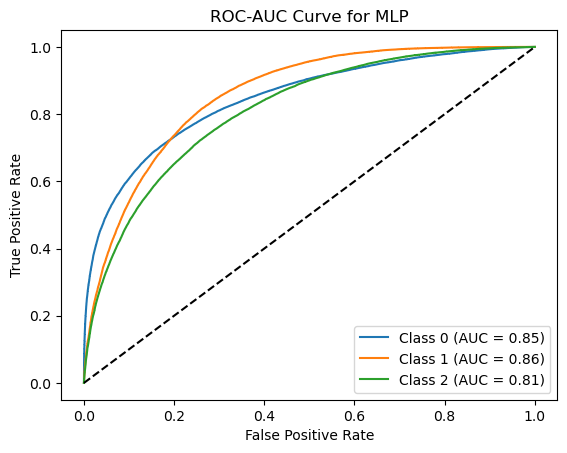

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.528006   0.519756  0.528006  0.521048  0.719396
1        Random Forest  0.924974   0.925104  0.924974  0.924963  0.984001
2        Decision Tree  0.836245   0.835730  0.836245  0.835835  0.877554
3              XGBoost  0.820639   0.817408  0.820639  0.816834  0.939370
4                  MLP  0.656268   0.662131  0.656268  0.656786  0.838398


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Split dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "MLP": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=100)
}

results = []
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) 

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()

    results.append([name, accuracy, report['weighted avg']['precision'],
                    report['weighted avg']['recall'], report['weighted avg']['f1-score'], roc_auc])

    # ROC Curve
    from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC curve
    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2]) 
    n_classes = y_test_binarized.shape[1]

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_binarized[:, i], y_prob[:, i]):.2f})")

    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-AUC Curve for {name}")
    plt.legend()
    plt.show()

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
print(results_df)



